## Crime Statistics for Virginia Beach.

The goal of this mini project was to analyze the crime records for the City of Virginia Beach and in doing so use tools that I have never used before. Data analysis often highlights information gaps, the strengths, the weakness, and pinpoints the way forward. 


#### 1. Data Collection
Data was sourced from the City of Virginia Beach website: https://data.vbgov.com/Public-Safety/Police-Incident-Reports/iqkq-gr5p and was saved in a csv file.

#### 2. Low-Fidelity prototype
Before I dive into data; I normally ask myself, "What is that I want to achieve with this dataset?". I relate this process to Lo-Fi prototyping which I learned as a Master's student in my [Mobile App development](https://www.cs.odu.edu/~jain/CS441-S19/index.html) class. Similar principles can be applied here. With the crime statistics data, I wrote down a few basic questions that I hope would be answered.

+ What are the different types of crimes reported?
+ How many instances of these crimes are reported?
+ Has the crime rate increased, decreased, or stablized over a period of time?
+ How many crimes were commited in 2019?
+ What month showcase the highest instance of crime rate?
+ Lastly, which area or neighbourhood is most affected by crime?

#### 3. Data preprocessing
Often considered tedious and boring, this is where most of the learning takes place. If you get this step right, there are a lot of fun things you can do with your data. First step in preprocessing is identifying the libraries that one would need and it is coorelated with Step 2. of Lo-Fi prototyping. 

If you know what you want from your data, you can determine the libraries you need to get it done.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

Now that we have imported the essential modules. Let's use the pandas built in function to read a csv file into a dataframe. This dataframe will help us see the content of the csv file. 

In [2]:
#reading a csv file
file = pd.read_csv("./file.csv", encoding="unicode_escape")
#displaying the columns and the first five rows
file.head()
#in order to display the end of the file, you can use file.tail()

,Unnamed: 0,Police Case Number,Date Reported,Date Occured,Date Found,Offense Code,Offense Description,Subdivision,Zone ID,Case Status,Location,lat,lon
0,75299,2018027541,07/20/2018 12:15:00 PM,03/26/2018 5:17:00 PM,03/26/2018 5:17:00 PM,26A7,"FRAUD, IDENTITY THEFT",BAYSIDE BOROUGH,328.0,OTHER,WITCHDUCK RD N/INDEPENDENCE BL\nVIRGINIA BEACH...,36.876148,-76.133802
1,99283,2019019440,05/28/2019 6:25:00 PM,05/28/2019 6:25:00 PM,05/28/2019 6:25:00 PM,90ZK,OVERDOSE,BAYSIDE BOROUGH,328.0,OTHER,WITCHDUCK RD N/INDEPENDENCE BL\nVIRGINIA BEACH...,36.876148,-76.133802
2,1697,2016031822,08/02/2016 2:58:00 AM,08/02/2016 2:57:00 AM,08/02/2016 2:58:00 AM,35A1,DRUG/ NARCOTIC VIOLATIONS,NaN,325.0,CLEARED BY ARREST,"WITCHDUCK RD N/264 NO\nVIRGINIA BEACH, VA",36.844373,-76.156683
3,17858,2016014880,04/18/2016 1:00:00 AM,04/17/2016 12:59:00 AM,04/17/2016 12:59:00 AM,520B,"WEAPON LAW, CONCEALED WEAPON(S)",GREEN RUN,128.0,CLEARED BY ARREST,WEEPING WILLOW LA/LYNNHAVEN PW\nVIRGINIA BEACH...,36.798407,-76.086839
4,24107,2017005324,02/12/2017 1:30:00 PM,02/12/2017 1:00:00 PM,02/12/2017 1:00:00 PM,90ZC,HIT & RUN,HILLTOP,226.0,CLEARED BY ARREST,"WATERFRONT DR/BIRDNECK RD N\nVIRGINIA BEACH, VA",36.850379,-75.994368




Let's look at the column names first and see which of these need to be changed. This is done in order to make sure the data is more readable by Python. I see there are two columns that I want to focus on for the purpose of this sample project i.e. Date Reported and Offense Description

In [3]:
#Display the names of the columns
file.columns

Index(['Unnamed: 0', 'Police Case Number', 'Date Reported', 'Date Occured',
       'Date Found', 'Offense Code', 'Offense Description', 'Subdivision',
       'Zone ID', 'Case Status', 'Location', 'lat', 'lon'],
      dtype='object')

In [4]:
#Rename the columns
file = file.rename(columns = {"Date Reported": "Date_Reported", "Offense Description": "Offense_Description"})

#Display the new names of the columns.
file.columns

Index(['Unnamed: 0', 'Police Case Number', 'Date_Reported', 'Date Occured',
       'Date Found', 'Offense Code', 'Offense_Description', 'Subdivision',
       'Zone ID', 'Case Status', 'Location', 'lat', 'lon'],
      dtype='object')

Next, I want to add a new column in the csv file called, "Year" so that it will be easier for me visualize some of the trends over the years.

In [5]:
# pandas .insert function will do the trick. We have to specify the place of the new column, the name,
# and the value it will hold.
file.insert(3, 'Year', 'Any')

In [6]:
# pandas datetime index will help us extract the year from the Date_Reported Column and .head() will display
# the changes we made.
file['Year'] = pd.DatetimeIndex(file['Date_Reported']).year
file.head()

,Unnamed: 0,Police Case Number,Date_Reported,Year,Date Occured,Date Found,Offense Code,Offense_Description,Subdivision,Zone ID,Case Status,Location,lat,lon
0,75299,2018027541,07/20/2018 12:15:00 PM,2018,03/26/2018 5:17:00 PM,03/26/2018 5:17:00 PM,26A7,"FRAUD, IDENTITY THEFT",BAYSIDE BOROUGH,328.0,OTHER,WITCHDUCK RD N/INDEPENDENCE BL\nVIRGINIA BEACH...,36.876148,-76.133802
1,99283,2019019440,05/28/2019 6:25:00 PM,2019,05/28/2019 6:25:00 PM,05/28/2019 6:25:00 PM,90ZK,OVERDOSE,BAYSIDE BOROUGH,328.0,OTHER,WITCHDUCK RD N/INDEPENDENCE BL\nVIRGINIA BEACH...,36.876148,-76.133802
2,1697,2016031822,08/02/2016 2:58:00 AM,2016,08/02/2016 2:57:00 AM,08/02/2016 2:58:00 AM,35A1,DRUG/ NARCOTIC VIOLATIONS,NaN,325.0,CLEARED BY ARREST,"WITCHDUCK RD N/264 NO\nVIRGINIA BEACH, VA",36.844373,-76.156683
3,17858,2016014880,04/18/2016 1:00:00 AM,2016,04/17/2016 12:59:00 AM,04/17/2016 12:59:00 AM,520B,"WEAPON LAW, CONCEALED WEAPON(S)",GREEN RUN,128.0,CLEARED BY ARREST,WEEPING WILLOW LA/LYNNHAVEN PW\nVIRGINIA BEACH...,36.798407,-76.086839
4,24107,2017005324,02/12/2017 1:30:00 PM,2017,02/12/2017 1:00:00 PM,02/12/2017 1:00:00 PM,90ZC,HIT & RUN,HILLTOP,226.0,CLEARED BY ARREST,"WATERFRONT DR/BIRDNECK RD N\nVIRGINIA BEACH, VA",36.850379,-75.994368


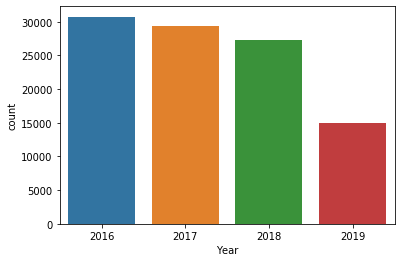

In [7]:
#Seaborn is a data visualization library built on Matplotlib. I love
# that you can create simple count plots in a few lines of codes. Here's one below

crime = file.drop(columns='Offense_Description')
crime = file.dropna(axis=0)
sns.countplot(data=crime, x='Year')

In [8]:
# In the column name, "Offense_Description" we see a lot of different categories or names of crimes. Let's
# see how many kinds there are

print('There are {} types of crimes in this dataset'.format(len(set(crime['Offense_Description']))))

There are 129 types of crimes in this dataset


In [9]:
file['Offense_Description'].unique()

array(['FRAUD, IDENTITY THEFT', 'OVERDOSE', 'DRUG/ NARCOTIC VIOLATIONS',
       'WEAPON LAW, CONCEALED WEAPON(S)', 'HIT & RUN',
       'WEAPON LAW VIOLATIONS', 'LARCENY, ALL OTHERS', 'ASSAULT, SIMPLE',
       'ALL OTHER REPORTABLE OFFENSES', 'INTIMIDATION', 'ARSON',
       'BOMB THREATS', 'DESTRUCTION OF PROPERTY, PRIVATE PROPERTY',
       'DRUG/ EQUIPMENT VIOLATIONS', 'MOTOR VEHICLE THEFT',
       'RECOVERED VEHICLE- STOLEN OTHER JURISDICTION',
       'CRUELTY TO ANIMALS', 'FUGITIVE (OUT OF STATE)',
       'WEAPON LAW, SHOOTING IN A VEHICLE', 'ASSAULT, SIMPLE, DOMESTIC',
       'THREATEN BODILY HARM', 'LARCENY, FROM MOTOR VEHICLE',
       'UNAUTHORIZED USE OF AUTO', 'OBSTRUCTING JUSTICE',
       'ANNOYING PHONE CALLS/ HARASSING COMMUNICATION',
       'LARCENY, SHOPLIFTING', 'EMBEZZLEMENT', 'ROBBERY',
       'COUNTERFEITING/ FORGERY, ALL OTHERS', 'LARCENY, FROM BUILDING',
       'BURGLARY/ B & E, COMMERCIAL', 'FRAUD, ALL OTHERS',
       'LIQUOR LAW VIOLATIONS', 'FALSE INFORMATION TO PO

In [10]:
# Let's look at the top 10

file.Offense_Description.value_counts().head(10)

LARCENY, FROM MOTOR VEHICLE                  10974
DESTRUCTION OF PROPERTY, PRIVATE PROPERTY    10164
HIT & RUN                                     9184
ASSAULT, SIMPLE                               8829
LARCENY, ALL OTHERS                           7590
DRUG/ NARCOTIC VIOLATIONS                     7354
ASSAULT, SIMPLE, DOMESTIC                     6619
LARCENY, SHOPLIFTING                          5621
LARCENY, FROM BUILDING                        3485
DRUG/ EQUIPMENT VIOLATIONS                    3015
Name: Offense_Description, dtype: int64

In [11]:
#Now I want to focus on only the current year i.e. 2019 and look at the 10 highest categories of crime rates.

file = file.loc[file['Year'].isin([2019])]
file.Offense_Description.value_counts().head(10)

HIT & RUN                                    1478
LARCENY, FROM MOTOR VEHICLE                  1466
ASSAULT, SIMPLE                              1298
DESTRUCTION OF PROPERTY, PRIVATE PROPERTY    1224
DRUG/ NARCOTIC VIOLATIONS                    1223
ASSAULT, SIMPLE, DOMESTIC                    1134
LARCENY, ALL OTHERS                          1124
LARCENY, SHOPLIFTING                          788
DRUG/ EQUIPMENT VIOLATIONS                    495
LARCENY, FROM BUILDING                        421
Name: Offense_Description, dtype: int64

In [12]:
file.Offense_Description.count()

15270

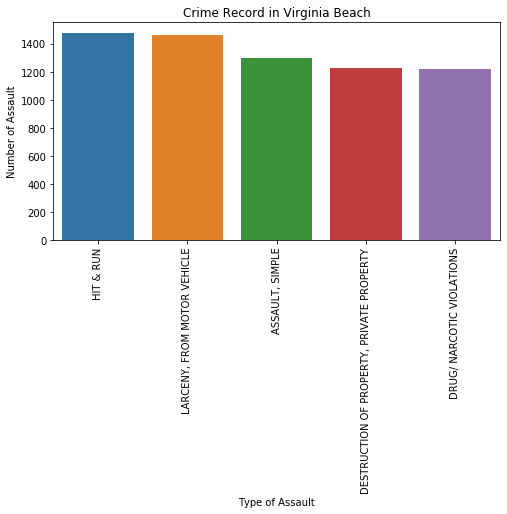

In [13]:
# Visualizing the first five.

plt.subplots(figsize = (8,4))
sns.barplot(file.Offense_Description.value_counts()[:5].index,file.Offense_Description.value_counts()[:5])
plt.xticks(rotation = 90)
plt.xlabel('Type of Assault')
plt.ylabel('Number of Assault')
plt.title('Crime Record in Virginia Beach')
plt.show()

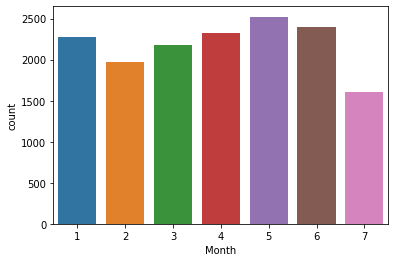

In [14]:
# Using the datetime index like earlier we can see the distribution month wise. Visualizing it in simple bar
# graphs tell us that the highest crime count was for the 5th month i.e. May.

file.insert(4,"Month","Any")
file['Month'] = pd.DatetimeIndex(file['Date_Reported']).month
file.head()
sns.countplot(data=file, x='Month')

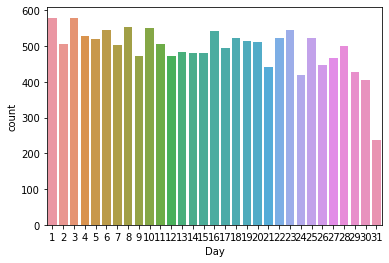

In [15]:
file.insert(5,"Day","Any")
file['Day'] = pd.DatetimeIndex(file['Date_Reported']).day
file.head()
sns.countplot(data=file, x='Day')

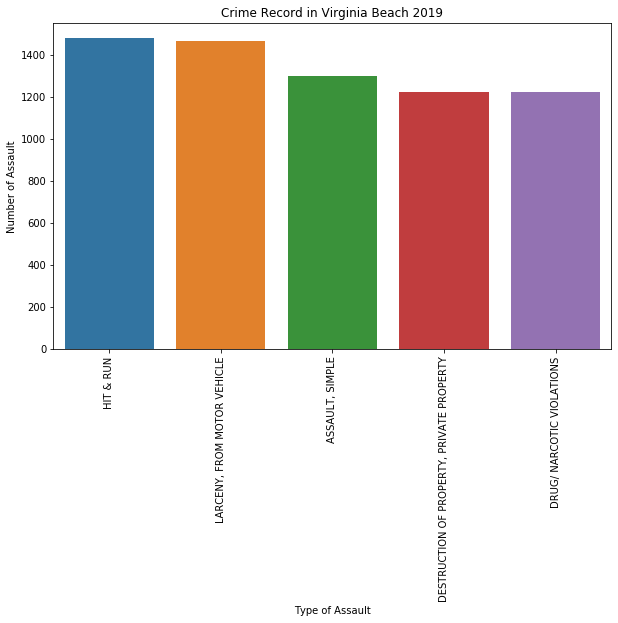

In [16]:
plt.subplots(figsize = (10,6))
sns.barplot(file.Offense_Description.value_counts()[:5].index,file.Offense_Description.value_counts()[:5])
plt.xticks(rotation = 90)
plt.xlabel('Type of Assault')
plt.ylabel('Number of Assault')
plt.title('Crime Record in Virginia Beach 2019')
plt.show()

I was interested to see which crimes occured and where. I pulled out the most easily available 
shape file from the City of Virginia Beach GIS center. Link to GIS database: https://data-vbgov.opendata.arcgis.com/

In order to visualize the location and load those maps, I needed to import GeoPandas and few other dependencies.

In [17]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, polygon

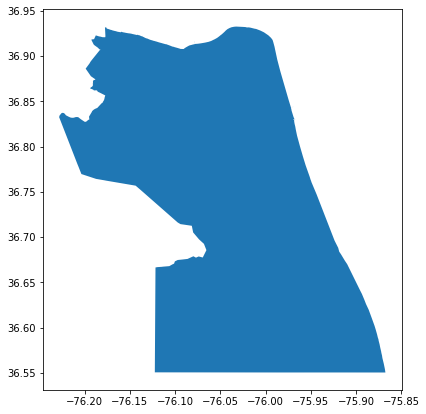

In [18]:
#Let's look at the shape files for VB.

map = gpd.read_file('./City_Boundary/City_Boundary.shp')
figure,ax = plt.subplots(figsize = [7,7])
map.plot(ax=ax)

In [19]:
#Let's focus on latitudes and longitudes.

geometry = [Point(xy) for xy in zip(file["lon"], file["lat"])]
geometry[:3]
crs = {'init': 'epsg:4326'}

In [20]:
geo_df = gpd.GeoDataFrame(file,crs=crs,geometry=geometry)
geo_df.head()

,Unnamed: 0,Police Case Number,Date_Reported,Year,Month,Day,Date Occured,Date Found,Offense Code,Offense_Description,Subdivision,Zone ID,Case Status,Location,lat,lon,geometry
1,99283,2019019440,05/28/2019 6:25:00 PM,2019,5,28,05/28/2019 6:25:00 PM,05/28/2019 6:25:00 PM,90ZK,OVERDOSE,BAYSIDE BOROUGH,328.0,OTHER,WITCHDUCK RD N/INDEPENDENCE BL\nVIRGINIA BEACH...,36.876148,-76.133802,POINT (-76.1338023 36.8761481)
14,102708,2019018125,05/19/2019 11:00:00 PM,2019,5,19,05/19/2019 8:10:00 PM,05/19/2019 8:10:00 PM,13B1,"ASSAULT, SIMPLE",LANDSTOWN AREA,424.0,CLEARED BY ARREST,"SALEM RD/INDEPENDENCE BL S\nVIRGINIA BEACH, VA",36.780839,-76.121746,POINT (-76.12174570000001 36.7808386)
15,102709,2019018125,05/19/2019 11:00:00 PM,2019,5,19,05/19/2019 8:10:00 PM,05/19/2019 8:10:00 PM,13B1,"ASSAULT, SIMPLE",LANDSTOWN AREA,424.0,CLEARED BY ARREST,"SALEM RD/INDEPENDENCE BL S\nVIRGINIA BEACH, VA",36.780839,-76.121746,POINT (-76.12174570000001 36.7808386)
16,102710,2019018125,05/19/2019 11:00:00 PM,2019,5,19,05/19/2019 8:10:00 PM,05/19/2019 8:10:00 PM,13B1,"ASSAULT, SIMPLE",LANDSTOWN AREA,424.0,CLEARED BY ARREST,"SALEM RD/INDEPENDENCE BL S\nVIRGINIA BEACH, VA",36.780839,-76.121746,POINT (-76.12174570000001 36.7808386)
17,102714,2019018125,05/19/2019 11:00:00 PM,2019,5,19,05/19/2019 8:10:00 PM,05/19/2019 8:10:00 PM,290B,"DESTRUCTION OF PROPERTY, PRIVATE PROPERTY",LANDSTOWN AREA,424.0,CLEARED BY ARREST,"SALEM RD/INDEPENDENCE BL S\nVIRGINIA BEACH, VA",36.780839,-76.121746,POINT (-76.12174570000001 36.7808386)


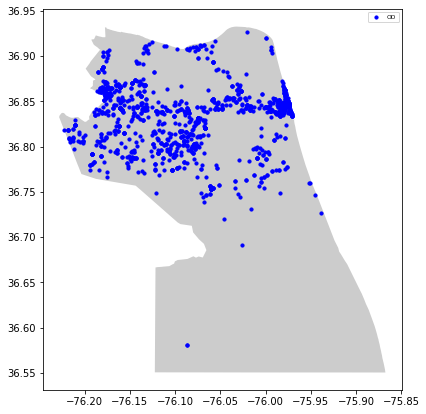

In [21]:
# From the,"Offense_Description" column I can choose to map any of the category names. I can have them
# layover the map/shape file we found. I have chose 'ASSAULT, SIMPLE' but you can change that to any other
# category and have it layover the 

fig,ax = plt.subplots(figsize = [7,7])
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Offense_Description'] == 'ASSAULT, SIMPLE'].plot(ax=ax, markersize=10, color='blue',marker='o',label='OD')
plt.legend(prop={'size': 6})

At the beginning of this mini project I asked a few questions to which I hoped to seek answers. With 
these few techniques. I did get answers to my questions

1. What are the different types of crimes reported?
- There are 129 different types of crimes reported in City of Virginia Beach.

2. How many instances of these crimes are reported?
- There were 10974 instances of LARCENY, FROM MOTOR VEHICLE. This was the highest reported crime from last 4 years.

3. Has the crime rate increased, decreased, or stablized over a period of time?
- The crime rate has fallen from 2016 - 2018. We'll have to trust our Law and Enforcement agencies to keep it low for the year of 2019.

4. How many crimes were commited in 2019?
- 15270 cases were reported in 2019.

5. What month showcase the highest instance of crime rate?
- For the year 2019, May has the highest instance of crime rate.

6. Lastly, which area or neighbourhood is most affected by crime?
- With the shape files available, this question remained unanswered.


Simple bar graphs can say a lot about data. Again this was a small afternoon project. I learned something new about GeoPandas, Open data GIS, and Google's GeoCode. I am going to write about Google's Geocode and using it with Microsoft Excel in a blog post. I found it really fascinating, there would be better/faster way to get Latitude's and Longitudes but the goal at the end of the day is to learn something new everyday.